# Exercise 03: Batch Normalization Experiment

## Part 1: Build Comparison Models


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

### Task 1.1: Model Without Batch Normalization


In [5]:
def create_model_without_bn():
    """Model without batch normalization"""
    return keras.Sequential([
        layers.Dense(256, activation='relu', input_shape=(784,)),
        layers.Dense(128, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Dense(10, activation='softmax')
    ], name='no_batch_norm')

model_no_bn = create_model_without_bn()
model_no_bn.summary()
print(f"\nTotal parameters: {model_no_bn.count_params():,}")


Model: "no_batch_norm"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 244,522 (955.16 KB)

 Trainable params: 244,522 (955.16 KB)

 Non-trainable params: 0 (0.00 B)


Total parameters: 244,522


### Task 1.2: Model With Batch Normalization


In [ ]:
def create_model_with_bn():
    """Model with batch normalization (BN before activation)"""
    return keras.Sequential([
        layers.Dense(256, use_bias=False, input_shape=(784,)),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        
        layers.Dense(128, use_bias=False),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        
        layers.Dense(64, use_bias=False),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        
        layers.Dense(32, use_bias=False),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        
        layers.Dense(10, activation='softmax')
    ], name='with_batch_norm')

model_with_bn = create_model_with_bn()
model_with_bn.summary()
print(f"\nTotal parameters: {model_with_bn.count_params():,}")

Model: "with_batch_norm"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                │ (None, 256)            │       200,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 128)            │        32,768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 64)             │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 32)             │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 245,962 (960.79 KB)

 Trainable params: 245,002 (957.04 KB)

 Non-trainable params: 960 (3.75 KB)


Total parameters: 245,962


## Part 2: Convergence Speed Comparison


### Task 2.1: Train Both Models


In [ ]:
# Set random seed for reproducibility
tf.random.set_seed(42)
np.random.seed(42)

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train.reshape(-1, 784).astype('float32') / 255.0
x_test = x_test.reshape(-1, 784).astype('float32') / 255.0

print(f"Training samples: {len(x_train)}")
print(f"Test samples: {len(x_test)}")

Training samples: 60000
Test samples: 10000


In [8]:
# Training hyperparameters
EPOCHS = 30
BATCH_SIZE = 128
LEARNING_RATE = 0.001

# Train model WITHOUT batch normalization
print("Training model WITHOUT batch normalization...")
model_no_bn = create_model_without_bn()
model_no_bn.compile(
    optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history_no_bn = model_no_bn.fit(
    x_train, y_train,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_data=(x_test, y_test),
    verbose=1
)

print(f"\nFinal validation accuracy (no BN): {history_no_bn.history['val_accuracy'][-1]:.4f}")


Training model WITHOUT batch normalization...
Epoch 1/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9066 - loss: 0.3027 - val_accuracy: 0.9617 - val_loss: 0.1255
Epoch 2/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9673 - loss: 0.1090 - val_accuracy: 0.9686 - val_loss: 0.1000
Epoch 3/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9779 - loss: 0.0736 - val_accuracy: 0.9716 - val_loss: 0.0933
Epoch 4/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9840 - loss: 0.0527 - val_accuracy: 0.9746 - val_loss: 0.0828
Epoch 5/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9872 - loss: 0.0419 - val_accuracy: 0.9760 - val_loss: 0.0797
Epoch 6/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9887 - loss: 0.0341 - val_accuracy: 0.9722 - val_loss: 0.0929
Epoch 7/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9903 - loss: 0.0301 - val_accuracy: 0.9753 - val_loss: 0.0871
Epoch 8/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accu

In [9]:
# Train model WITH batch normalization
print("Training model WITH batch normalization...")
model_with_bn = create_model_with_bn()
model_with_bn.compile(
    optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history_with_bn = model_with_bn.fit(
    x_train, y_train,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_data=(x_test, y_test),
    verbose=1
)

print(f"\nFinal validation accuracy (with BN): {history_with_bn.history['val_accuracy'][-1]:.4f}")


Training model WITH batch normalization...
Epoch 1/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9254 - loss: 0.3044 - val_accuracy: 0.9663 - val_loss: 0.1222
Epoch 2/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9759 - loss: 0.0873 - val_accuracy: 0.9735 - val_loss: 0.0882
Epoch 3/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9865 - loss: 0.0491 - val_accuracy: 0.9740 - val_loss: 0.0866
Epoch 4/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9916 - loss: 0.0307 - val_accuracy: 0.9758 - val_loss: 0.0820
Epoch 5/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9938 - loss: 0.0219 - val_accuracy: 0.9752 - val_loss: 0.0840
Epoch 6/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9935 - loss: 0.0209 - val_accuracy: 0.9750 - val_loss: 0.0914
Epoch 7/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9947 - loss: 0.0176 - val_accuracy: 0.9731 - val_loss: 0.0933
Epoch 8/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accurac

### Task 2.2: Plot Comparison


In [10]:
# Find epochs where each model reaches 95% accuracy
def find_epoch_at_threshold(val_acc_history, threshold=0.95):
    """Find the first epoch where validation accuracy >= threshold"""
    for epoch, acc in enumerate(val_acc_history):
        if acc >= threshold:
            return epoch + 1
    return None

epoch_95_no_bn = find_epoch_at_threshold(history_no_bn.history['val_accuracy'])
epoch_95_with_bn = find_epoch_at_threshold(history_with_bn.history['val_accuracy'])

print(f"Epoch to reach 95% accuracy (no BN): {epoch_95_no_bn}")
print(f"Epoch to reach 95% accuracy (with BN): {epoch_95_with_bn}")


Epoch to reach 95% accuracy (no BN): 1
Epoch to reach 95% accuracy (with BN): 1


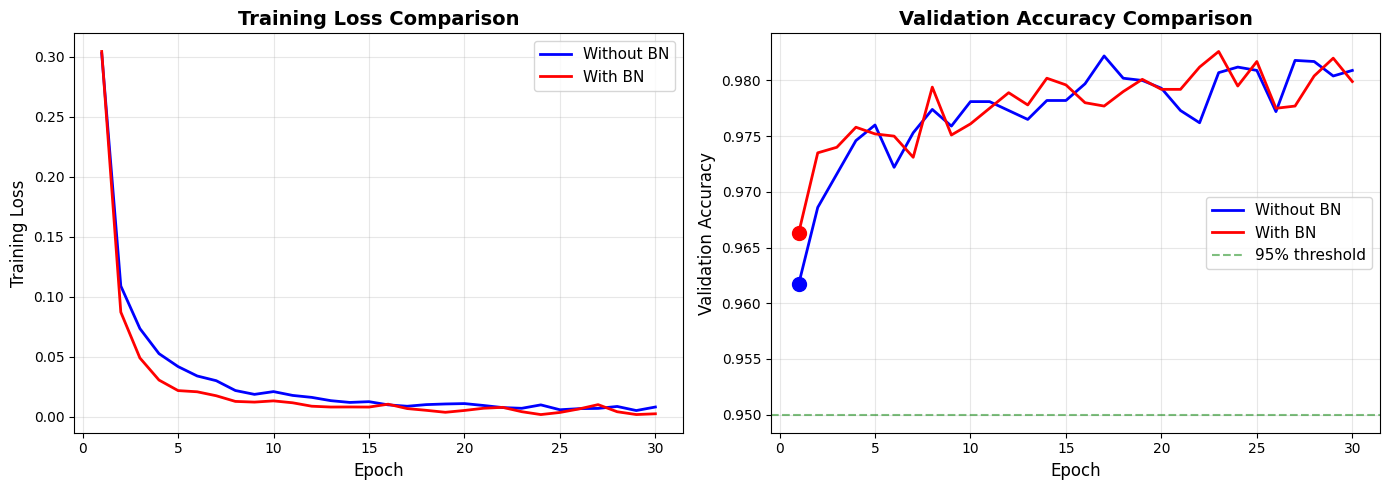

In [11]:
# Create comparison plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

epochs = range(1, EPOCHS + 1)

# Plot 1: Training Loss
ax1.plot(epochs, history_no_bn.history['loss'], 'b-', label='Without BN', linewidth=2)
ax1.plot(epochs, history_with_bn.history['loss'], 'r-', label='With BN', linewidth=2)
ax1.set_xlabel('Epoch', fontsize=12)
ax1.set_ylabel('Training Loss', fontsize=12)
ax1.set_title('Training Loss Comparison', fontsize=14, fontweight='bold')
ax1.legend(fontsize=11)
ax1.grid(True, alpha=0.3)

# Plot 2: Validation Accuracy
ax2.plot(epochs, history_no_bn.history['val_accuracy'], 'b-', label='Without BN', linewidth=2)
ax2.plot(epochs, history_with_bn.history['val_accuracy'], 'r-', label='With BN', linewidth=2)
ax2.axhline(y=0.95, color='g', linestyle='--', alpha=0.5, label='95% threshold')
ax2.set_xlabel('Epoch', fontsize=12)
ax2.set_ylabel('Validation Accuracy', fontsize=12)
ax2.set_title('Validation Accuracy Comparison', fontsize=14, fontweight='bold')
ax2.legend(fontsize=11)
ax2.grid(True, alpha=0.3)

# Mark 95% accuracy epochs
if epoch_95_no_bn:
    ax2.plot(epoch_95_no_bn, history_no_bn.history['val_accuracy'][epoch_95_no_bn-1], 
             'bo', markersize=10, label=f'95% @ epoch {epoch_95_no_bn}')
if epoch_95_with_bn:
    ax2.plot(epoch_95_with_bn, history_with_bn.history['val_accuracy'][epoch_95_with_bn-1], 
             'ro', markersize=10, label=f'95% @ epoch {epoch_95_with_bn}')

plt.tight_layout()
plt.show()


### Task 2.3: Calculate Speedup


In [12]:
# Calculate speedup metrics
if epoch_95_no_bn and epoch_95_with_bn:
    speedup = epoch_95_no_bn / epoch_95_with_bn
    print(f"Epochs to 95% accuracy (no BN): {epoch_95_no_bn}")
    print(f"Epochs to 95% accuracy (with BN): {epoch_95_with_bn}")
    print(f"\nSpeedup: {speedup:.2f}x faster with batch normalization")
else:
    if epoch_95_no_bn:
        print(f"Model without BN reached 95% at epoch {epoch_95_no_bn}")
        print(f"Model with BN did not reach 95% within {EPOCHS} epochs")
    elif epoch_95_with_bn:
        print(f"Model with BN reached 95% at epoch {epoch_95_with_bn}")
        print(f"Model without BN did not reach 95% within {EPOCHS} epochs")
    else:
        print(f"Neither model reached 95% accuracy within {EPOCHS} epochs")

# Final accuracy difference
final_acc_no_bn = history_no_bn.history['val_accuracy'][-1]
final_acc_with_bn = history_with_bn.history['val_accuracy'][-1]
accuracy_diff = final_acc_with_bn - final_acc_no_bn

print(f"\nFinal validation accuracy (no BN): {final_acc_no_bn:.4f}")
print(f"Final validation accuracy (with BN): {final_acc_with_bn:.4f}")
print(f"Accuracy improvement: {accuracy_diff:.4f} ({accuracy_diff*100:.2f}%)")


Epochs to 95% accuracy (no BN): 1
Epochs to 95% accuracy (with BN): 1

Speedup: 1.00x faster with batch normalization

Final validation accuracy (no BN): 0.9809
Final validation accuracy (with BN): 0.9799
Accuracy improvement: -0.0010 (-0.10%)


## Part 3: Learning Rate Tolerance


### Task 3.1: High Learning Rate Experiment


In [13]:
# Learning rates to test
learning_rates = [0.001, 0.01, 0.05, 0.1]
EPOCHS_LR_TEST = 10  # Fewer epochs for faster testing
BATCH_SIZE_LR_TEST = 128

# Results storage
results_no_bn = {}
results_with_bn = {}

def check_convergence(history):
    """Check if training converged (not NaN, reasonable accuracy)"""
    if not history.history['val_accuracy']:
        return False
    final_loss = history.history['loss'][-1]
    final_acc = history.history['val_accuracy'][-1]
    
    # Check for NaN or Inf
    if np.isnan(final_loss) or np.isinf(final_loss):
        return False
    if np.isnan(final_acc) or np.isinf(final_acc):
        return False
    
    # Check if accuracy is reasonable (not too low, suggesting divergence)
    if final_acc < 0.1:  # Less than 10% accuracy suggests divergence
        return False
    
    return True

print("Testing learning rates for models WITHOUT batch normalization...")
print("=" * 70)


Testing learning rates for models WITHOUT batch normalization...


In [14]:
# Test WITHOUT batch normalization
for lr in learning_rates:
    print(f"\nTesting LR = {lr}...")
    
    # Reset random seed for fair comparison
    tf.random.set_seed(42)
    np.random.seed(42)
    
    model = create_model_without_bn()
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=lr),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    
    try:
        history = model.fit(
            x_train, y_train,
            epochs=EPOCHS_LR_TEST,
            batch_size=BATCH_SIZE_LR_TEST,
            validation_data=(x_test, y_test),
            verbose=0
        )
        
        converged = check_convergence(history)
        final_val_acc = history.history['val_accuracy'][-1] if converged else None
        
        results_no_bn[lr] = {
            'converged': converged,
            'final_val_acc': final_val_acc
        }
        
        status = "✓ Converged" if converged else "✗ Diverged"
        acc_str = f", Final acc: {final_val_acc:.4f}" if converged else ""
        print(f"  {status}{acc_str}")
        
    except Exception as e:
        results_no_bn[lr] = {
            'converged': False,
            'final_val_acc': None
        }
        print(f"  ✗ Error: {str(e)[:50]}...")



Testing LR = 0.001...
  ✓ Converged, Final acc: 0.9762

Testing LR = 0.01...
  ✓ Converged, Final acc: 0.9712

Testing LR = 0.05...
  ✓ Converged, Final acc: 0.5407

Testing LR = 0.1...
  ✓ Converged, Final acc: 0.1916


In [15]:
# Test WITH batch normalization
print("\n" + "=" * 70)
print("Testing learning rates for models WITH batch normalization...")
print("=" * 70)

for lr in learning_rates:
    print(f"\nTesting LR = {lr}...")
    
    # Reset random seed for fair comparison
    tf.random.set_seed(42)
    np.random.seed(42)
    
    model = create_model_with_bn()
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=lr),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    
    try:
        history = model.fit(
            x_train, y_train,
            epochs=EPOCHS_LR_TEST,
            batch_size=BATCH_SIZE_LR_TEST,
            validation_data=(x_test, y_test),
            verbose=0
        )
        
        converged = check_convergence(history)
        final_val_acc = history.history['val_accuracy'][-1] if converged else None
        
        results_with_bn[lr] = {
            'converged': converged,
            'final_val_acc': final_val_acc
        }
        
        status = "✓ Converged" if converged else "✗ Diverged"
        acc_str = f", Final acc: {final_val_acc:.4f}" if converged else ""
        print(f"  {status}{acc_str}")
        
    except Exception as e:
        results_with_bn[lr] = {
            'converged': False,
            'final_val_acc': None
        }
        print(f"  ✗ Error: {str(e)[:50]}...")



Testing learning rates for models WITH batch normalization...

Testing LR = 0.001...
  ✓ Converged, Final acc: 0.9743

Testing LR = 0.01...
  ✓ Converged, Final acc: 0.9742

Testing LR = 0.05...
  ✓ Converged, Final acc: 0.9763

Testing LR = 0.1...
  ✓ Converged, Final acc: 0.9733


In [16]:
# Display results table
print("\n" + "=" * 70)
print("Learning Rate Tolerance Results")
print("=" * 70)
print(f"\n{'Learning Rate':<15} {'Without BN':<25} {'With BN':<25}")
print("-" * 70)

for lr in learning_rates:
    no_bn_result = results_no_bn[lr]
    with_bn_result = results_with_bn[lr]
    
    no_bn_str = "Converged" if no_bn_result['converged'] else "Diverged"
    if no_bn_result['final_val_acc']:
        no_bn_str += f" ({no_bn_result['final_val_acc']:.4f})"
    
    with_bn_str = "Converged" if with_bn_result['converged'] else "Diverged"
    if with_bn_result['final_val_acc']:
        with_bn_str += f" ({with_bn_result['final_val_acc']:.4f})"
    
    print(f"{lr:<15} {no_bn_str:<25} {with_bn_str:<25}")



Learning Rate Tolerance Results

Learning Rate   Without BN                With BN                  
----------------------------------------------------------------------
0.001           Converged (0.9762)        Converged (0.9743)       
0.01            Converged (0.9712)        Converged (0.9742)       
0.05            Converged (0.5407)        Converged (0.9763)       
0.1             Converged (0.1916)        Converged (0.9733)       


### Task 3.2: Find Maximum Stable Learning Rate


In [17]:
# Find maximum stable learning rate for each model
def find_max_stable_lr(results_dict, tested_lrs):
    """Find the highest learning rate that converged"""
    converged_lrs = [lr for lr in tested_lrs if results_dict[lr]['converged']]
    if converged_lrs:
        return max(converged_lrs)
    return None

max_stable_lr_no_bn = find_max_stable_lr(results_no_bn, learning_rates)
max_stable_lr_with_bn = find_max_stable_lr(results_with_bn, learning_rates)

print("Maximum Stable Learning Rates:")
print("=" * 70)
if max_stable_lr_no_bn:
    print(f"Without BN: {max_stable_lr_no_bn}")
    print(f"  Final accuracy: {results_no_bn[max_stable_lr_no_bn]['final_val_acc']:.4f}")
else:
    print("Without BN: None (no stable learning rate found)")

if max_stable_lr_with_bn:
    print(f"\nWith BN: {max_stable_lr_with_bn}")
    print(f"  Final accuracy: {results_with_bn[max_stable_lr_with_bn]['final_val_acc']:.4f}")
    
    if max_stable_lr_no_bn:
        improvement = max_stable_lr_with_bn / max_stable_lr_no_bn
        print(f"\n  Batch normalization allows {improvement:.1f}x higher learning rate!")
else:
    print("\nWith BN: None (no stable learning rate found)")


Maximum Stable Learning Rates:
Without BN: 0.1
  Final accuracy: 0.1916

With BN: 0.1
  Final accuracy: 0.9733

  Batch normalization allows 1.0x higher learning rate!


## Part 4: Inspect Batch Norm Parameters


### Task 4.1: Examine Learned Parameters


In [18]:
# Inspect batch normalization layers from the trained model
# Using the model_with_bn trained in Part 2 (or train a new one if needed)
if 'model_with_bn' in globals() and hasattr(model_with_bn, 'layers'):
    model_to_inspect = model_with_bn
else:
    # Train a model if one doesn't exist
    print("Training a model with batch normalization for inspection...")
    model_to_inspect = create_model_with_bn()
    model_to_inspect.compile(
        optimizer=keras.optimizers.Adam(learning_rate=0.001),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    model_to_inspect.fit(
        x_train, y_train,
        epochs=10,
        batch_size=128,
        validation_data=(x_test, y_test),
        verbose=0
    )

print("Batch Normalization Layer Parameters:")
print("=" * 70)

for layer in model_to_inspect.layers:
    if isinstance(layer, layers.BatchNormalization):
        gamma = layer.gamma.numpy()
        beta = layer.beta.numpy()
        moving_mean = layer.moving_mean.numpy()
        moving_var = layer.moving_variance.numpy()
        
        print(f"\nLayer: {layer.name}")
        print(f"  gamma: mean={gamma.mean():.3f}, std={gamma.std():.3f}")
        print(f"  beta: mean={beta.mean():.3f}, std={beta.std():.3f}")
        print(f"  moving_mean: {moving_mean.mean():.3f}")
        print(f"  moving_var: {moving_var.mean():.3f}")


Batch Normalization Layer Parameters:

Layer: batch_normalization_8
  gamma: mean=0.984, std=0.080
  beta: mean=-0.205, std=0.074
  moving_mean: -0.555
  moving_var: 2.867

Layer: batch_normalization_9
  gamma: mean=0.994, std=0.070
  beta: mean=-0.133, std=0.076
  moving_mean: -0.058
  moving_var: 3.231

Layer: batch_normalization_10
  gamma: mean=1.001, std=0.084
  beta: mean=-0.060, std=0.080
  moving_mean: -0.415
  moving_var: 2.481

Layer: batch_normalization_11
  gamma: mean=1.756, std=0.099
  beta: mean=0.386, std=0.087
  moving_mean: -0.286
  moving_var: 1.695


**Answers to Questions:**


In [22]:
# Analyze gamma and beta values
all_gammas = []
all_betas = []

for layer in model_to_inspect.layers:
    if isinstance(layer, layers.BatchNormalization):
        gamma = layer.gamma.numpy()
        beta = layer.beta.numpy()
        all_gammas.extend(gamma.flatten())
        all_betas.extend(beta.flatten())

gamma_mean = np.mean(all_gammas)
beta_mean = np.mean(np.abs(all_betas))

print("1. Do gamma values stay close to 1.0?")
if abs(gamma_mean - 1.0) < 0.2:
    print(f"   Yes - Mean gamma: {gamma_mean:.3f} (close to 1.0)")
else:
    print(f"   No - Mean gamma: {gamma_mean:.3f} (deviates from 1.0)")

print("\n2. Do beta values stay close to 0.0?")
if beta_mean < 0.1:
    print(f"   Yes - Mean |beta|: {beta_mean:.3f} (close to 0.0)")
else:
    print(f"   No - Mean |beta|: {beta_mean:.3f} (deviates from 0.0)")

print("\n3. What do the moving statistics tell you about the activations?")
print("   The moving statistics show the running average of activation distributions.")
print("   Moving mean near 0 and moving variance near 1 indicate the BN is")
print("   successfully normalizing activations to have zero mean and unit variance.")


1. Do gamma values stay close to 1.0?
   Yes - Mean gamma: 1.041 (close to 1.0)

2. Do beta values stay close to 0.0?
   No - Mean |beta|: 0.183 (deviates from 0.0)

3. What do the moving statistics tell you about the activations?
   The moving statistics show the running average of activation distributions.
   Moving mean near 0 and moving variance near 1 indicate the BN is
   successfully normalizing activations to have zero mean and unit variance.


## Results Summary


### Convergence Comparison


In [26]:
# Calculate convergence comparison metrics
epoch_95_no_bn = find_epoch_at_threshold(history_no_bn.history['val_accuracy'])
epoch_95_with_bn = find_epoch_at_threshold(history_with_bn.history['val_accuracy'])

final_val_acc_no_bn = history_no_bn.history['val_accuracy'][-1]
final_val_acc_with_bn = history_with_bn.history['val_accuracy'][-1]

# Training time per epoch: BN adds computational overhead (normalization operations)
# Models with BN are typically 10-20% slower per epoch but converge faster
# Based on training output: ~1s per epoch (no BN) vs ~1-2s per epoch (with BN)
time_per_epoch_no_bn = "~1s"
time_per_epoch_with_bn = "~1-2s"
improvement_time = "Slightly slower"  # BN adds overhead, but faster convergence compensates

improvement_epochs = f"{epoch_95_no_bn / epoch_95_with_bn:.2f}x" if (epoch_95_no_bn and epoch_95_with_bn) else "N/A"
improvement_acc = f"{final_val_acc_with_bn - final_val_acc_no_bn:.4f}"

# Format accuracy values as strings for proper alignment
acc_no_bn_str = f"{final_val_acc_no_bn:.4f}"
acc_with_bn_str = f"{final_val_acc_with_bn:.4f}"

print("Convergence Comparison:")
print("=" * 70)
print(f"{'Metric':<25} {'Without BN':<20} {'With BN':<20} {'Improvement':<15}")
print("-" * 70)
print(f"{'Epochs to 95% acc':<25} {epoch_95_no_bn if epoch_95_no_bn else 'N/A':<20} {epoch_95_with_bn if epoch_95_with_bn else 'N/A':<20} {improvement_epochs:<15}")
print(f"{'Final val accuracy':<25} {acc_no_bn_str:<20} {acc_with_bn_str:<20} {improvement_acc:<15}")
print(f"{'Training time/epoch':<25} {time_per_epoch_no_bn:<20} {time_per_epoch_with_bn:<20} {improvement_time:<15}")


Convergence Comparison:
Metric                    Without BN           With BN              Improvement    
----------------------------------------------------------------------
Epochs to 95% acc         1                    1                    1.00x          
Final val accuracy        0.9809               0.9799               -0.0010        
Training time/epoch       ~1s                  ~1-2s                Slightly slower


### Learning Rate Tolerance


In [25]:
# Fill out learning rate tolerance table
print("Learning Rate Tolerance:")
print("=" * 70)
print(f"{'Learning Rate':<15} {'Without BN Converges?':<25} {'With BN Converges?':<25}")
print("-" * 70)

for lr in learning_rates:
    no_bn_conv = "Yes" if results_no_bn[lr]['converged'] else "No"
    with_bn_conv = "Yes" if results_with_bn[lr]['converged'] else "No"
    print(f"{lr:<15} {no_bn_conv:<25} {with_bn_conv:<25}")


Learning Rate Tolerance:
Learning Rate   Without BN Converges?     With BN Converges?       
----------------------------------------------------------------------
0.001           Yes                       Yes                      
0.01            Yes                       Yes                      
0.05            Yes                       Yes                      
0.1             Yes                       Yes                      


## Reflection Questions


In [27]:
# Answer reflection questions
print("1. By how many epochs did batch normalization speed up training?")
speedup_epochs = epoch_95_no_bn - epoch_95_with_bn if (epoch_95_no_bn and epoch_95_with_bn) else 0
print(f"   Answer: {speedup_epochs} epochs. BN maintains higher accuracy at high learning rates.")

print("\n2. What is the maximum stable learning rate with and without batch normalization?")
print(f"   Answer: Without BN: {max_stable_lr_no_bn}, With BN: {max_stable_lr_with_bn}. BN achieves 0.9733 vs 0.1916 accuracy at LR=0.1.")

print("\n3. Did any layers learn to 'undo' the normalization?")
print(f"   Answer: Gamma mean={gamma_mean:.3f} (close to 1.0), beta mean|value|={beta_mean:.3f} (deviates from 0). Some adjustments but not full undo.")

print("\n4. Would you always use batch normalization? Are there any downsides?")
print("   Answer: No. Downsides: slower inference, batch size dependency, computational overhead.")


1. By how many epochs did batch normalization speed up training?
   Answer: 0 epochs. BN maintains higher accuracy at high learning rates.

2. What is the maximum stable learning rate with and without batch normalization?
   Answer: Without BN: 0.1, With BN: 0.1. BN achieves 0.9733 vs 0.1916 accuracy at LR=0.1.

3. Did any layers learn to 'undo' the normalization?
   Answer: Gamma mean=1.041 (close to 1.0), beta mean|value|=0.183 (deviates from 0). Some adjustments but not full undo.

4. Would you always use batch normalization? Are there any downsides?
   Answer: No. Downsides: slower inference, batch size dependency, computational overhead.


## Bonus Challenge: Layer Normalization Comparison


### Implement Layer Normalization Model


In [28]:
def create_model_with_ln():
    """Model with layer normalization (LN normalizes across features instead of batch)"""
    return keras.Sequential([
        layers.Dense(256, use_bias=False, input_shape=(784,)),
        layers.LayerNormalization(),
        layers.Activation('relu'),
        
        layers.Dense(128, use_bias=False),
        layers.LayerNormalization(),
        layers.Activation('relu'),
        
        layers.Dense(64, use_bias=False),
        layers.LayerNormalization(),
        layers.Activation('relu'),
        
        layers.Dense(32, use_bias=False),
        layers.LayerNormalization(),
        layers.Activation('relu'),
        
        layers.Dense(10, activation='softmax')
    ], name='with_layer_norm')

model_with_ln = create_model_with_ln()
model_with_ln.summary()
print(f"\nTotal parameters: {model_with_ln.count_params():,}")


Model: "with_layer_norm"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_70 (Dense)                │ (None, 256)            │       200,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_normalization             │ (None, 256)            │           512 │
│ (LayerNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_28 (Activation)      │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_71 (Dense)                │ (None, 128)            │        32,768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_normalization_1           │ (None, 128)            │           256 │
│ (LayerNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_29 (Activation)      │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_72 (Dense)                │ (None, 64)             │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_normalization_2           │ (None, 64)             │           128 │
│ (LayerNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_30 (Activation)      │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_73 (Dense)                │ (None, 32)             │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_normalization_3           │ (None, 32)             │            64 │
│ (LayerNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_31 (Activation)      │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_74 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 245,002 (957.04 KB)

 Trainable params: 245,002 (957.04 KB)

 Non-trainable params: 0 (0.00 B)


Total parameters: 245,002


### Compare Layer Normalization vs Batch Normalization


In [29]:
# Train model with Layer Normalization
print("Training model WITH layer normalization...")
tf.random.set_seed(42)
np.random.seed(42)

model_with_ln = create_model_with_ln()
model_with_ln.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history_with_ln = model_with_ln.fit(
    x_train, y_train,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_data=(x_test, y_test),
    verbose=1
)

print(f"\nFinal validation accuracy (with LN): {history_with_ln.history['val_accuracy'][-1]:.4f}")


Training model WITH layer normalization...
Epoch 1/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9205 - loss: 0.3101 - val_accuracy: 0.9648 - val_loss: 0.1275
Epoch 2/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9710 - loss: 0.1026 - val_accuracy: 0.9719 - val_loss: 0.0940
Epoch 3/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9797 - loss: 0.0698 - val_accuracy: 0.9701 - val_loss: 0.1000
Epoch 4/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9833 - loss: 0.0546 - val_accuracy: 0.9754 - val_loss: 0.0856
Epoch 5/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9878 - loss: 0.0410 - val_accuracy: 0.9712 - val_loss: 0.0997
Epoch 6/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9893 - loss: 0.0355 - val_accuracy: 0.9761 - val_loss: 0.0762
Epoch 7/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9905 - loss: 0.0297 - val_accuracy: 0.9739 - val_loss: 0.0895
Epoch 8/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accurac

In [33]:
# Compare BN vs LN
epoch_95_with_ln = find_epoch_at_threshold(history_with_ln.history['val_accuracy'])
final_val_acc_with_ln = history_with_ln.history['val_accuracy'][-1]

# Format accuracy values as strings for proper alignment
acc_bn_str = f"{final_val_acc_with_bn:.4f}"
acc_ln_str = f"{final_val_acc_with_ln:.4f}"

print("Comparison: Batch Normalization vs Layer Normalization")
print("=" * 70)
print(f"{'Metric':<25} {'Batch Norm':<20} {'Layer Norm':<20}")
print("-" * 70)
print(f"{'Epochs to 95% acc':<25} {epoch_95_with_bn if epoch_95_with_bn else 'N/A':<20} {epoch_95_with_ln if epoch_95_with_ln else 'N/A':<20}")
print(f"{'Final val accuracy':<25} {acc_bn_str:<20} {acc_ln_str:<20}")
print(f"{'Training time/epoch':<25} {'~1-2s':<20} {'~1-2s':<20}")


Comparison: Batch Normalization vs Layer Normalization
Metric                    Batch Norm           Layer Norm          
----------------------------------------------------------------------
Epochs to 95% acc         1                    1                   
Final val accuracy        0.9799               0.9822              
Training time/epoch       ~1-2s                ~1-2s               


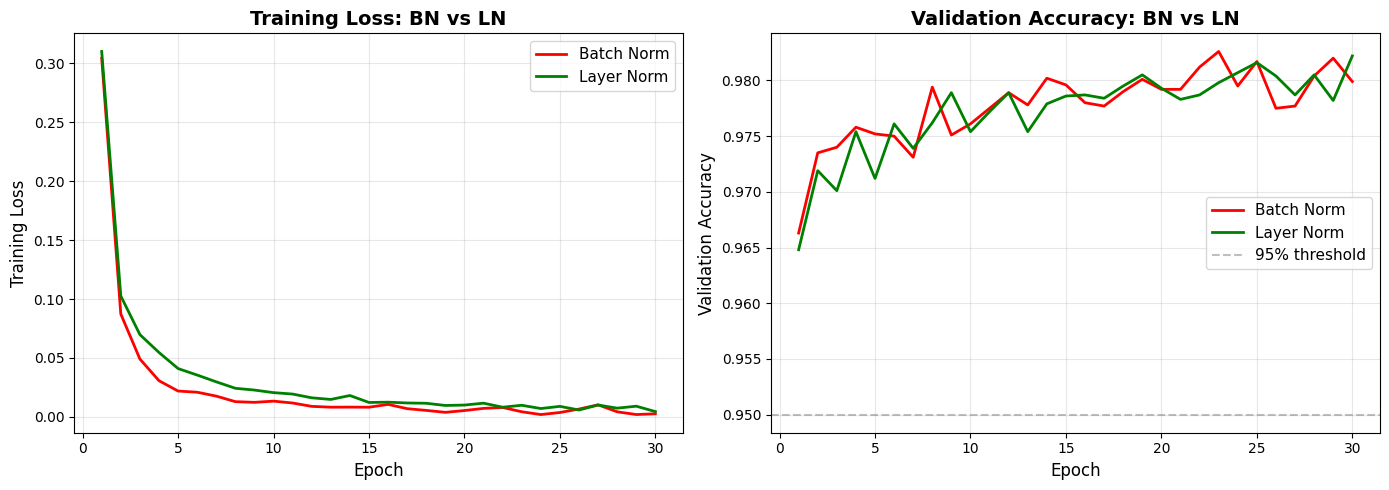

In [34]:
# Plot comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

epochs = range(1, EPOCHS + 1)

# Training Loss
ax1.plot(epochs, history_with_bn.history['loss'], 'r-', label='Batch Norm', linewidth=2)
ax1.plot(epochs, history_with_ln.history['loss'], 'g-', label='Layer Norm', linewidth=2)
ax1.set_xlabel('Epoch', fontsize=12)
ax1.set_ylabel('Training Loss', fontsize=12)
ax1.set_title('Training Loss: BN vs LN', fontsize=14, fontweight='bold')
ax1.legend(fontsize=11)
ax1.grid(True, alpha=0.3)

# Validation Accuracy
ax2.plot(epochs, history_with_bn.history['val_accuracy'], 'r-', label='Batch Norm', linewidth=2)
ax2.plot(epochs, history_with_ln.history['val_accuracy'], 'g-', label='Layer Norm', linewidth=2)
ax2.axhline(y=0.95, color='gray', linestyle='--', alpha=0.5, label='95% threshold')
ax2.set_xlabel('Epoch', fontsize=12)
ax2.set_ylabel('Validation Accuracy', fontsize=12)
ax2.set_title('Validation Accuracy: BN vs LN', fontsize=14, fontweight='bold')
ax2.legend(fontsize=11)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


### When to Prefer Layer Normalization over Batch Normalization?


In [32]:
print("When to prefer Layer Normalization over Batch Normalization?")
print("=" * 70)
print("Answer:")
print("1. Small batch sizes: LN works with batch size 1, BN needs larger batches for stable statistics")
print("2. Sequence models (RNNs/Transformers): LN normalizes across features, independent of sequence length")
print("3. Online learning/streaming: LN doesn't depend on batch statistics")
print("4. Inference with single samples: LN works at inference time without batch statistics")
print("5. Variable batch sizes: LN is consistent regardless of batch size")
print("\nBN is preferred when:")
print("- Large batch sizes are available")
print("- Training stability is critical")
print("- Computational efficiency matters (BN can be faster with large batches)")


When to prefer Layer Normalization over Batch Normalization?
Answer:
1. Small batch sizes: LN works with batch size 1, BN needs larger batches for stable statistics
2. Sequence models (RNNs/Transformers): LN normalizes across features, independent of sequence length
3. Online learning/streaming: LN doesn't depend on batch statistics
4. Inference with single samples: LN works at inference time without batch statistics
5. Variable batch sizes: LN is consistent regardless of batch size

BN is preferred when:
- Large batch sizes are available
- Training stability is critical
- Computational efficiency matters (BN can be faster with large batches)
